# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

- Inisiasi jumlah kluster secara random
- Tentukan posisi centroid secara random
- Hitung jarak antara data point ke centroid dan assign setiap data ke centroid terdekat sehingga membentuk cluster dengan menggunakan formula euclidean distance
- Hitung ulang centroid berdasarkan label-label data sebelumnya
- Assign kembali data point ke centroid terdekat yang terbaru lalu cek apakah ada perubahan dalam cluster atau tidak
- Jika ada perubahan maka perlu kembali mencari posisi centroid yang tidak mengubah cluster
- Lakukan perulangan sampai posisi centroid tidak berubah lagi



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


In [6]:
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [3]:
df.fillna(method = 'ffill', inplace = True)

In [17]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.5
    non_outlier = df[((df < upper) & (df > lower))]
    return non_outlier

In [18]:
df2 = remove_outlier(df[['Umur', 'Skor Belanja (1-100)']])
df2.dropna(axis = 0, inplace = True)
df2

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc = sc.fit_transform(df2.astype(float))

In [23]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(df_sc)
labels1 = kmeans1.labels_
labels1

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0], dtype=int32)

In [26]:
df3 = pd.DataFrame(data = df_sc, columns = ['Umur', 'Skor Belanja (1-100)'])
df3['Labels'] = labels1
df3

,Umur,Skor Belanja (1-100),Labels
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


n_cluster =2


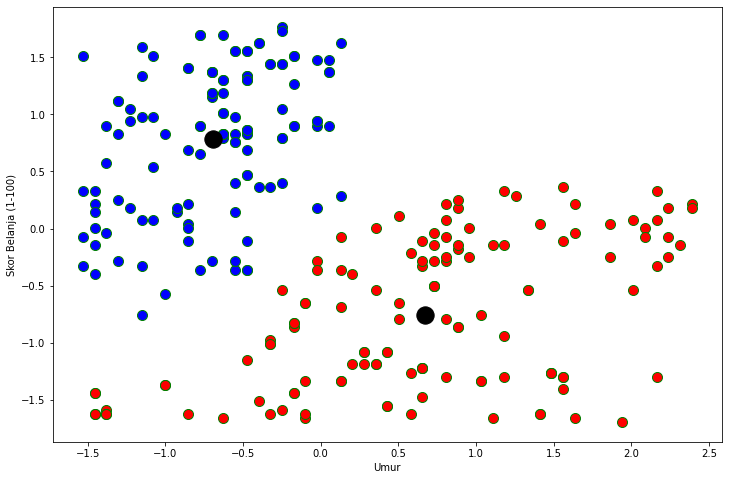

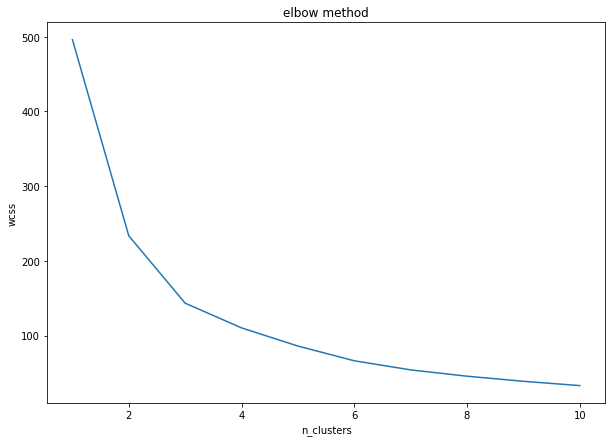

In [36]:
import matplotlib.pyplot as plt

print('n_cluster =2')
plt.figure(figsize = (12, 8))
plt.scatter(df3['Umur'][df3.Labels == 0], df3['Skor Belanja (1-100)'][df3.Labels == 0], c = 'blue', s = 100, edgecolors = 'green')
plt.scatter(df3['Umur'][df3.Labels == 1], df3['Skor Belanja (1-100)'][df3.Labels == 1], c = 'red', s = 100, edgecolors = 'green')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c = 'black', s = 300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(df_sc)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10, 7))
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
kmeans2 = KMeans(n_clusters = 3, random_state = 42).fit(df_sc)
labels2 = kmeans2.labels_
labels2

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2], dtype=int32)

In [38]:
df4 = pd.DataFrame(data = df_sc, columns = ['Umur', 'Skor Belanja (1-100)'])
df4['Labels'] = labels2
df4

,Umur,Skor Belanja (1-100),Labels
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,2
2,-1.379610,-1.587373,0
3,-1.153425,0.975009,2
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,2
244,1.560802,-1.298654,1
245,-0.248682,1.444178,2
246,-0.097892,-0.649036,0


n_cluster =3


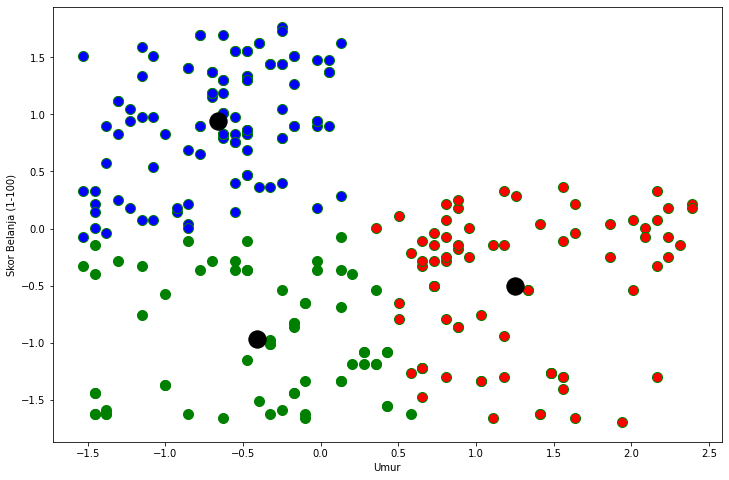

In [43]:
print('n_cluster =3')
plt.figure(figsize = (12, 8))
plt.scatter(df4['Umur'][df4.Labels == 0], df4['Skor Belanja (1-100)'][df4.Labels == 0], c = 'green', s = 100, edgecolors = 'green')
plt.scatter(df4['Umur'][df4.Labels == 1], df4['Skor Belanja (1-100)'][df4.Labels == 1], c = 'red', s = 100, edgecolors = 'green')
plt.scatter(df4['Umur'][df4.Labels == 2], df4['Skor Belanja (1-100)'][df4.Labels == 2], c = 'blue', s = 100, edgecolors = 'green')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c = 'black', s = 300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_sc, labels = labels1))
print(silhouette_score(df_sc, labels = labels2))

0.48555152598842644
0.4658669848365053


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

- Cluster berwarna biru merupakan cluster dengan umur yang memiliki rentang nilai dari -1.5 sampai 0.5 yang skor belanjanya tinggi, yaitu dari rentang nilai 0.0 sampai 1.6.
- Cluster berwarna hijau merupakan cluster dengan umur yang memiliki rentang nilai dari -1.5 sampai 0.5 yang skor belanjanya paling rendah, yaitu dari rentang nilai -1.6 sampai -0.1.
- Cluster berwarna merah merupakan cluster dengan umur yang memiliki rentang nilai dari 0.5 sampai 2.4 yang skor belanjanya rendah, yaitu dari rentang nilai -1.6 sampai 0.4.

- Supermarket sebaiknya melakukan promosi secara khusus untuk menyasar konsumen yang berada di cluster berwarna merah dan hijau agar bisa meningkatkan penjualan di segmen umur tersebut.